# Análise de predição envolvendo acidentes entre Goiânia e Brasília no ano de 2020.

Alunos: 
- Jhonatas Anthony Dantas Araújo.
- Guilherme Gomes de Medeiros.

In [94]:
# Importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
# Carregamento dos dados

df = pd.read_csv('./datatran2020.csv', sep=';', encoding='utf-8-sig')
df.head()  # Visualiza as primeiras linhas

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Aten��o do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingest�o de �lcool,Colis�o lateral,...,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompat�vel,Sa�da de leito carro��vel,...,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingest�o de �lcool,Capotamento,...,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR


In [96]:
df["tipo_acidente"] = df["tipo_acidente"].replace({
    "Falta de Aten��o do Pedestre": "Falta de Atenção do Pedestre",
    "Colis�o traseira": "Colisão Traseira", 
    "Colis�o lateral": "Colisão Lateral",
    "Sa�da de leito carro��vel": "Saída de leito carroçável",
    "Colis�o transversal": "Colisão Transversal",
    "Colis�o com objeto est�tico": "Colisão com objeto estático",
    "Colis�o frontal": "Colisão Frontal",
    "Colis�o com bicicleta": "Colisão com bicicleta",
    "Queda de ocupante de ve�culo": "Queda de ocupante de veículo"
    })

df["causa_acidente"] = df["causa_acidente"].replace({
    "Falta de Aten��o � Condu��o": "Falta de Atenção à Condução",
    "Desobedi�ncia � sinaliza��o": "Desobediência à sinalização",
    "Defeito Mec�nico no Ve�culo": "Defeito Mecânico no Veículo",
    "Ingest�o de �lcool": "Ingestão de Álcool",
    "Falta de Aten��o do Pedestre": "Falta de Atenção do Pedestre",
    "Condutor Dormindo": "Condutor Dormindo",
    "Velocidade Incompat�vel": "Velocidade Incompatível",
    "Ultrapassagem Indevida": "Ultrapassagem Indevida",
    "Defeito na Via": "Defeito na Via",
    "Animais na Pista": "Animais na Pista",
    "Avarias e/ou desgaste excessivo no pneu": "Avarias e/ou desgaste excessivo no pneu",
    "Restri��o de Visibilidade": "Restrição de Visibilidade",
    "Objeto est�tico sobre o leito carro��vel": "Objeto estático sobre o leito carroçável",
    "Desobedi�ncia �s normas de tr�nsito pelo pedestre": "Desobediência às normas de trânsito pelo pedestre",
    "Ingest�o de Subst�ncias Psicoativas": "Ingestão de Substâncias Psicoativas",
    "Desobedi�ncia �s normas de tr�nsito pelo condutor": "Desobediência às normas de trânsito pelo condutor",
    "N�o guardar dist�ncia de seguran�a": "Não guardar distância de segurança"
})

In [97]:
df.head() 

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão Lateral,...,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,...,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,...,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR


In [98]:
# Pré-processamento e limpeza

# Verificação de dados ausentes
print(df.isnull().sum())

# Removendo linhas com dados ausentes
df = df.dropna()

# Remoção de duplicatas
df = df.drop_duplicates()



id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        158
km                        158
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                   0
uop                       399
dtype: int64


In [99]:
# Análise exploratória

df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,62996.000000,62996.000000,62996.000000,62996.000000,62996.000000,62996.000000,62996.000000,62996.000000,62996.000000,62996.000000
mean,296757.770525,212.981507,2.321893,0.083354,0.855705,0.269477,0.955346,0.158010,1.125183,1.634532
std,20978.978355,130.992802,1.710701,0.340072,1.008184,0.599168,1.343464,0.436438,1.112248,0.725734
min,260036.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,278793.750000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,296787.500000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,314716.250000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,364903.000000,495.000000,73.000000,13.000000,42.000000,19.000000,73.000000,11.000000,44.000000,23.000000


In [100]:
# # Visualização de dados

# # Exemplo de histograma
# plt.figure(figsize=(8, 5))
# sns.histplot(df['feridos_graves'], kde=True)
# plt.title('Distribuição da quantidade de feridos graves')
# plt.show()

# # # Exemplo de gráfico de dispersão
# # plt.figure(figsize=(8, 5))
# # sns.scatterplot(x='feridos', y='mortos', data=df)
# # plt.title('Relação entre Coluna X e Coluna Y')
# # plt.show()


Top 10 Causa Acidente:
causa_acidente
Falta de Atenção à Condução                          22233
Desobediência às normas de trânsito pelo condutor     8732
Velocidade Incompatível                               5838
Ingestão de Álcool                                    5024
Defeito Mecânico no Veículo                           3714
Não guardar distância de segurança                    3582
Condutor Dormindo                                     2096
Pista Escorregadia                                    1986
Falta de Atenção do Pedestre                          1631
Animais na Pista                                      1397
Name: count, dtype: int64

Top 10 Tipo Acidente:
tipo_acidente
Colisão Traseira                11360
Saída de leito carroçável       10393
Colisão Transversal              7751
Colisão Lateral                  7380
Tombamento                       5525
Colisão com objeto estático      4835
Colisão Frontal                  4402
Atropelamento de Pedestre        2810
Queda

/tmp/ipykernel_4340/2629906712.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_causa.values, y=top10_causa.index, palette='viridis')


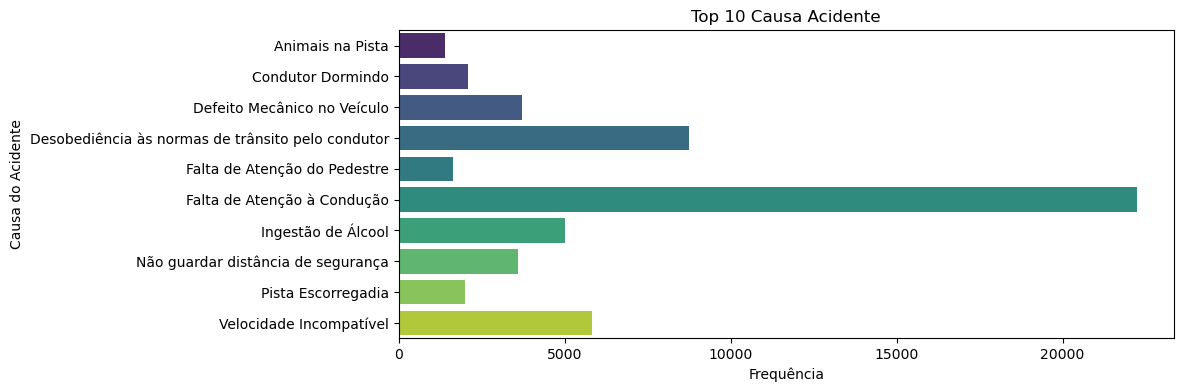


Relação entre Causa e Tipo de Acidente:
tipo_acidente                                       Atropelamento de Animal  \
causa_acidente                                                                
Acessar a via sem observar a presen�a dos outro...                        0   
Acesso irregular                                                          0   
Acostamento em desn�vel                                                   0   
Acumulo de areia ou detritos sobre o pavimento                            0   
Acumulo de �gua sobre o pavimento                                         0   
Acumulo de �leo sobre o pavimento                                         0   
Afundamento ou ondula��o no pavimento                                     0   
Agress�o Externa                                                          2   
Animais na Pista                                                       1077   
Aus�ncia de rea��o do condutor                                            0   
Aus�ncia de

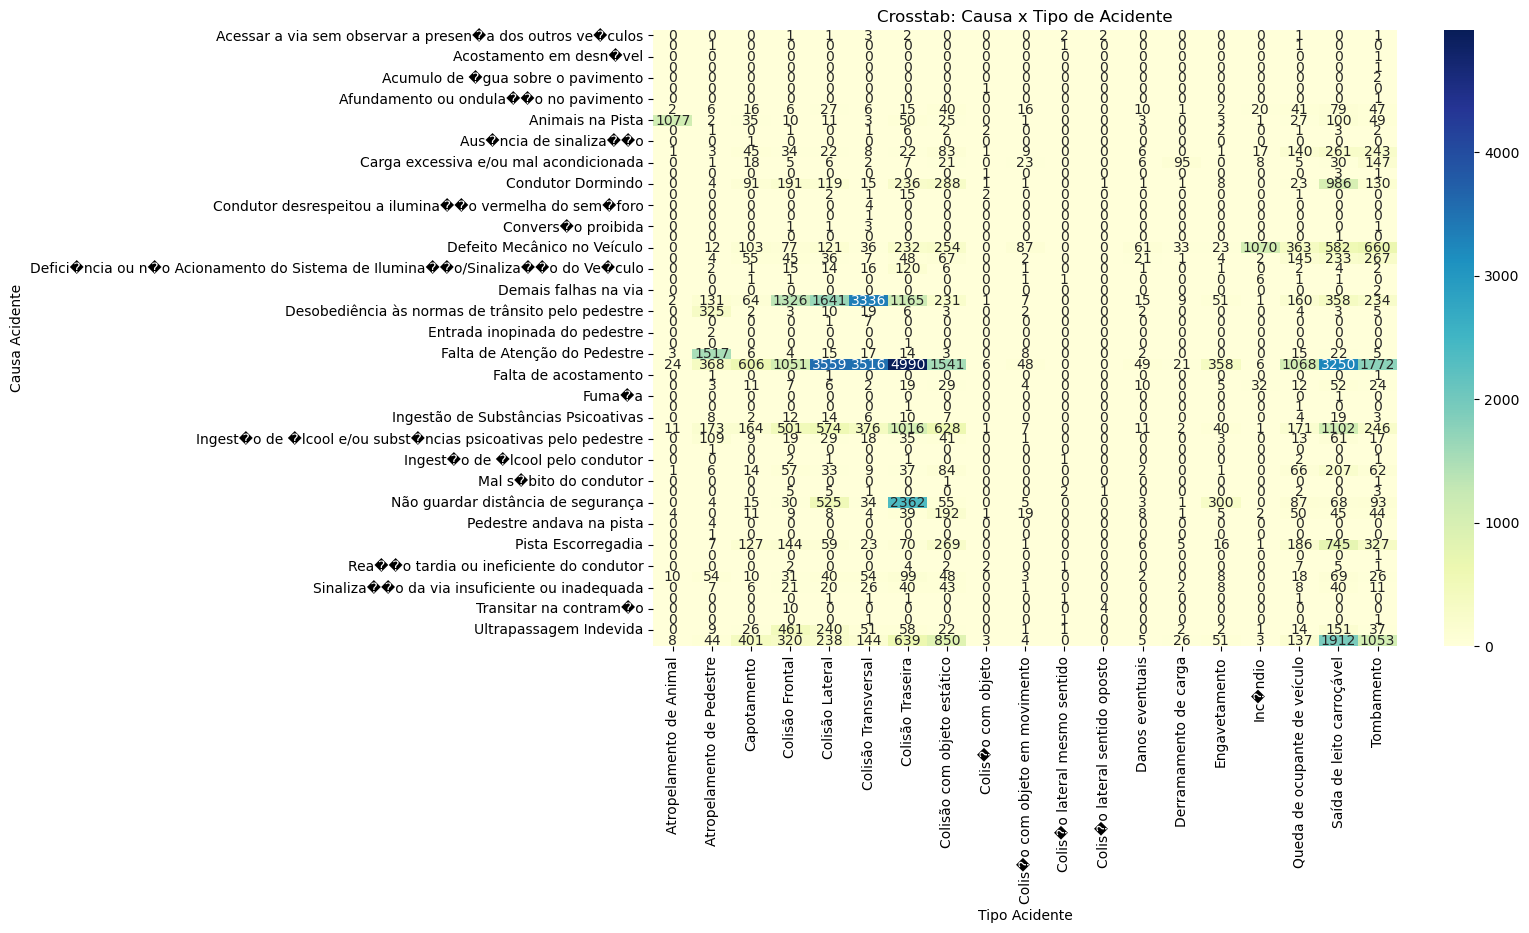

/tmp/ipykernel_4340/2629906712.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  causa_por_hora = df.groupby(['hora', 'causa_acidente']).size().reset_index(name='contagem')



Distribuição de Causa Acidente por Hora:
    hora                                     causa_acidente  contagem
0      0  Acessar a via sem observar a presen�a dos outr...         0
1      0                                   Acesso irregular         0
2      0                            Acostamento em desn�vel         0
3      0     Acumulo de areia ou detritos sobre o pavimento         0
4      0                  Acumulo de �gua sobre o pavimento         0
5      0                  Acumulo de �leo sobre o pavimento         0
6      0              Afundamento ou ondula��o no pavimento         0
7      0                                   Agress�o Externa        11
8      0                                   Animais na Pista        48
9      0                     Aus�ncia de rea��o do condutor         1
10     0                            Aus�ncia de sinaliza��o         0
11     0            Avarias e/ou desgaste excessivo no pneu         9
12     0             Carga excessiva e/ou mal ac

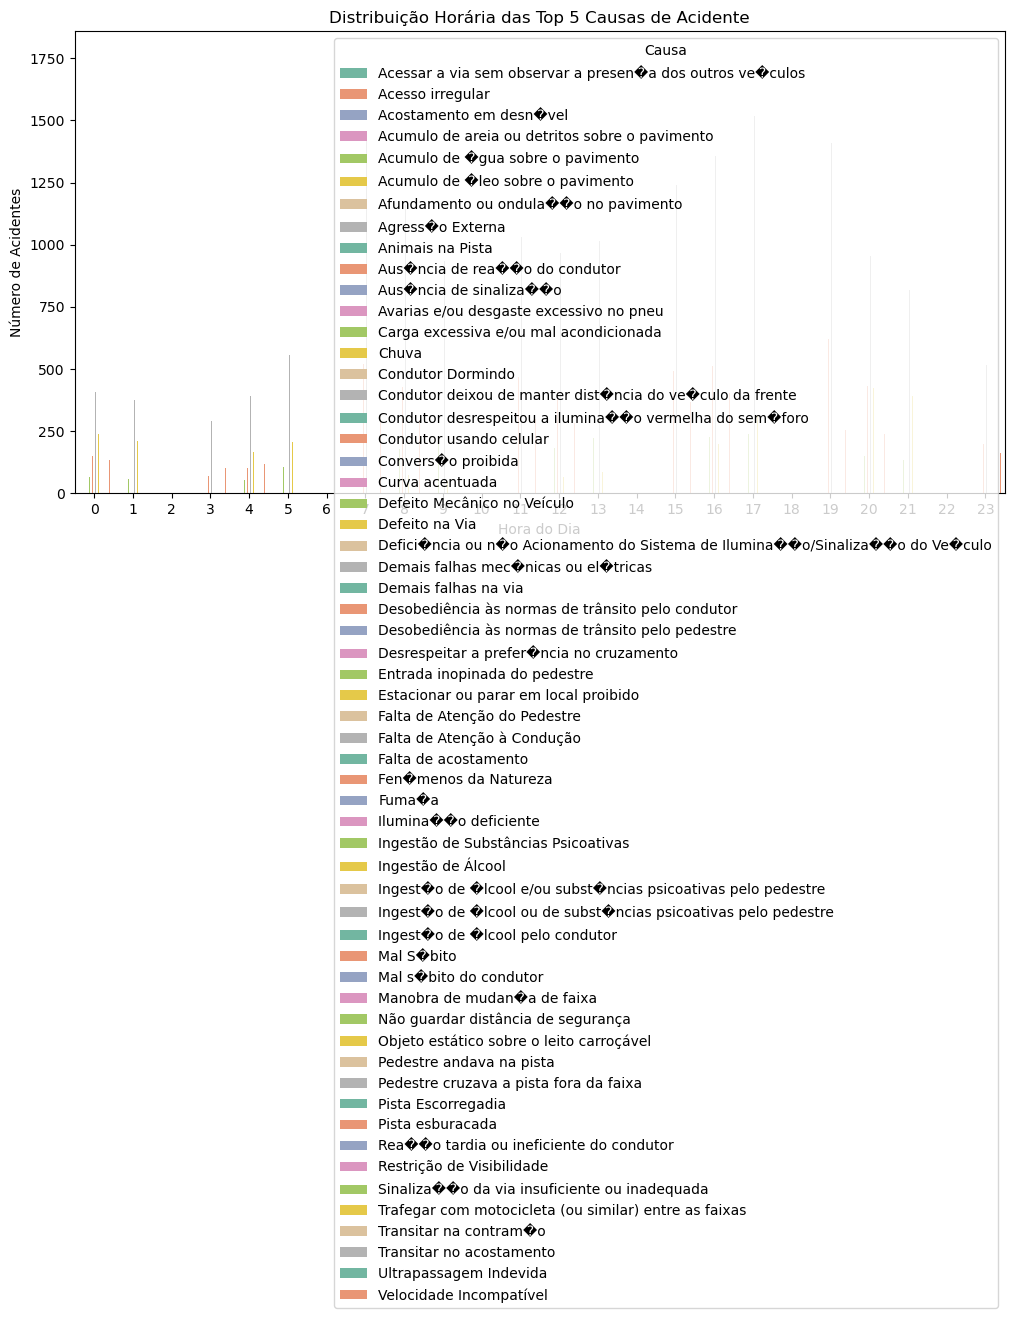

/tmp/ipykernel_4340/2629906712.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tipo_por_hora = df.groupby(['hora', 'tipo_acidente']).size().reset_index(name='contagem')



Distribuição de Tipo Acidente por Hora:
    hora                    tipo_acidente  contagem
0      0          Atropelamento de Animal        44
1      0        Atropelamento de Pedestre        63
2      0                      Capotamento        58
3      0                  Colisão Frontal       106
4      0                  Colisão Lateral       107
5      0              Colisão Transversal        70
6      0                 Colisão Traseira       192
7      0      Colisão com objeto estático       186
8      0               Colis�o com objeto         1
9      0  Colis�o com objeto em movimento         1
10     0    Colis�o lateral mesmo sentido         1
11     0   Colis�o lateral sentido oposto         1
12     0                  Danos eventuais         3
13     0            Derramamento de carga         3
14     0                    Engavetamento         7


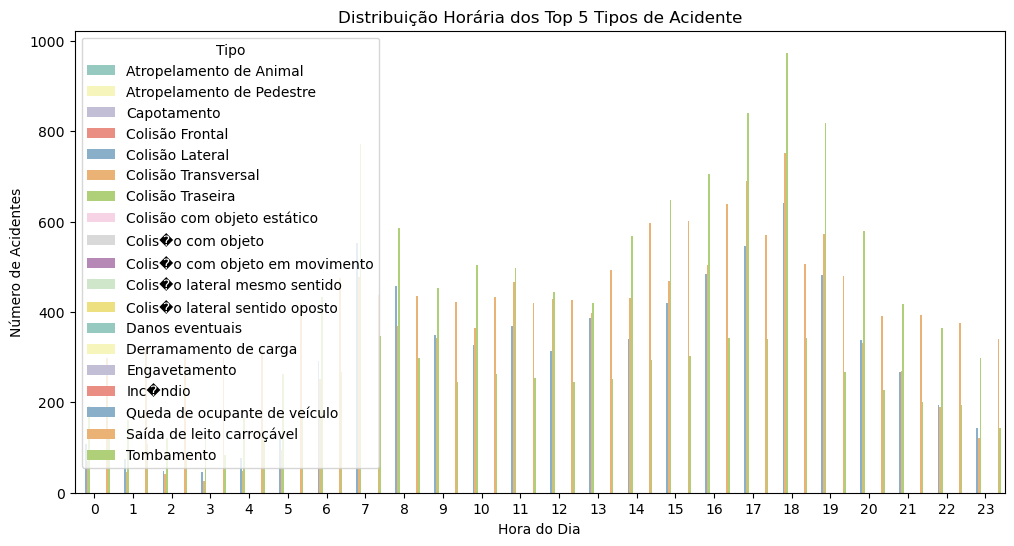

In [ ]:
# Converter colunas numéricas que usam vírgula para ponto (exemplo para a coluna 'km')
df['km'] = df['km'].str.replace(',', '.').astype(float)

# Converter a coluna de data para o tipo datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d')

# Converter as colunas de interesse para o tipo 'category' (enum)
df['causa_acidente'] = df['causa_acidente'].astype('category')
df['tipo_acidente'] = df['tipo_acidente'].astype('category')

# Se desejar, crie colunas com os códigos das categorias (opcional)
df['causa_enum'] = df['causa_acidente'].cat.codes
df['tipo_enum'] = df['tipo_acidente'].cat.codes

# Extrair a hora (como inteiro) da coluna "horario"
df['hora'] = pd.to_datetime(df['horario'], format='%H:%M:%S').dt.hour

# --- Top 10 de cada coluna ---

# Top 10 'causa_acidente'
top10_causa = df['causa_acidente'].value_counts().head(10)
print("Top 10 Causa Acidente:")
print(top10_causa)

# Top 10 'tipo_acidente'
top10_tipo = df['tipo_acidente'].value_counts().head(10)
print("\nTop 10 Tipo Acidente:")
print(top10_tipo)

# Visualizações dos top 10

# Extraindo os top 10 e removendo categorias não utilizadas
top10_causa = df['causa_acidente'].value_counts().head(10)
top10_causa.index = top10_causa.index.remove_unused_categories()

# Visualização do Top 10 Causa Acidente
plt.figure(figsize=(10,4))
sns.barplot(x=top10_causa.values, y=top10_causa.index, palette='viridis')
plt.title('Top 10 Causa Acidente')
plt.xlabel('Frequência')
plt.ylabel('Causa do Acidente')
plt.show()

# Extraindo os top 10 e removendo categorias não utilizadas
top10_tipo = df['tipo_acidente'].value_counts().head(10)
top10_tipo.index = top10_tipo.index.remove_unused_categories()

# Visualização do Top 10 Tipo Acidente
plt.figure(figsize=(10,4))
sns.barplot(x=top10_tipo.values, y=top10_tipo.index, palette='viridis')
plt.title('Top 10 Tipo Acidente')
plt.xlabel('Frequência')
plt.ylabel('Tipo de Acidente')
plt.show()

# --- Relação entre 'causa_acidente' e 'tipo_acidente' ---

# Tabela cruzada (crosstab)
crosstab_causa_tipo = pd.crosstab(df['causa_acidente'], df['tipo_acidente'])
print("\nRelação entre Causa e Tipo de Acidente:")
print(crosstab_causa_tipo)

# Visualização com heatmap
plt.figure(figsize=(12,8))
sns.heatmap(crosstab_causa_tipo, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Crosstab: Causa x Tipo de Acidente')
plt.xlabel('Tipo Acidente')
plt.ylabel('Causa Acidente')
plt.show()

# --- Relação de cada um com a coluna "horario" (hora) ---

# Analisando a distribuição de 'causa_acidente' por hora
causa_por_hora = df.groupby(['hora', 'causa_acidente']).size().reset_index(name='contagem')
print("\nDistribuição de Causa Acidente por Hora:")
print(causa_por_hora.head(15))  # exibindo as primeiras linhas

# Visualização: Para evitar excesso de categorias, podemos filtrar para as top 5 causas por exemplo
top5_causas = top10_causa.index[:5]
df_top5_causas = df[df['causa_acidente'].isin(top5_causas)]
plt.figure(figsize=(12,6))
sns.countplot(data=df_top5_causas, x='hora', hue='causa_acidente', palette='Set2')
plt.title('Distribuição Horária das Top 5 Causas de Acidente')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.legend(title='Causa')
plt.show()

# Analisando a distribuição de 'tipo_acidente' por hora
tipo_por_hora = df.groupby(['hora', 'tipo_acidente']).size().reset_index(name='contagem')
print("\nDistribuição de Tipo Acidente por Hora:")
print(tipo_por_hora.head(15))  # exibindo as primeiras linhas

# Visualização: Novamente, filtrando para as top 5 tipos, se necessário
top5_tipos = top10_tipo.index[:5]
df_top5_tipos = df[df['tipo_acidente'].isin(top5_tipos)]
plt.figure(figsize=(12,6))
sns.countplot(data=df_top5_tipos, x='hora', hue='tipo_acidente', palette='Set3')
plt.title('Distribuição Horária dos Top 5 Tipos de Acidente')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.legend(title='Tipo')
plt.show()

In [102]:
# # Aplicação de ferramentas de análise

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# # Exemplo de divisão dos dados
# # X = df[['coluna1', 'coluna2', 'coluna3']]
# y = df['coluna_alvo']
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exemplo de modelo de regressão
# modelo = LinearRegression()
# # modelo.fit(X_train, y_train)
# # y_pred = modelo.predict(X_test)
